# House price prediction model using Linear Regression, Decision Tree and Random Forest Algorithms and finding the best model 

In [1]:
# importing all the important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression    # for linear regression model
from sklearn.tree import DecisionTreeRegressor       # for decision tree regressor problem
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score   # for cross validation
from sklearn.metrics import mean_squared_error, mean_absolute_error
sns.set()


# About the Data
**The dataset used for this project is ibtained from Kaggle**

In [2]:
dataset = pd.read_csv(r"C:\Users\HP\Downloads\py\House price Prediction final\kc_house_data.csv")


In [3]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
dataset.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# Hypothesis : -

**After reading the dataset it seems that the target variable (price) is dependent on features ('bedrooms', 'bathrooms', 'sqft_living','floors', 'condition', 'grade', )**

 # Exploratory Data Analyst :-

In [5]:
dataset.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
dataset.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
dataset.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# => Creating plots for our hypothesis variables :-

**Checking wheteher target variable (price) is dependent on features ('bedrooms', 'bathrooms', 'sqft_living','floors', 'condition', 'grade', 'yr_renovated') or not**


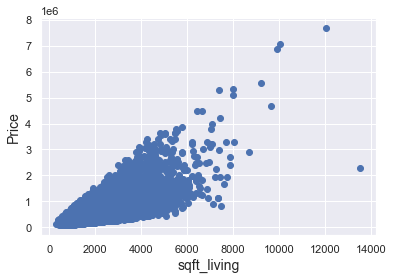

In [8]:


plt.scatter(dataset['sqft_living'], dataset['price'])
plt.xlabel('sqft_living', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

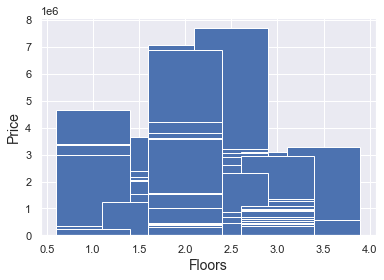

In [9]:

plt.bar(dataset['floors'], dataset['price'])
plt.xlabel('Floors', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

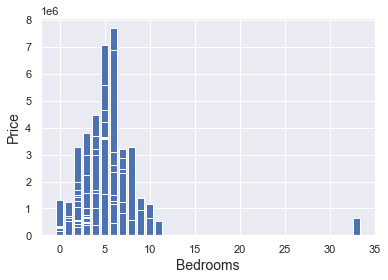

In [10]:
plt.bar(dataset['bedrooms'], dataset['price'])
plt.xlabel('Bedrooms', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

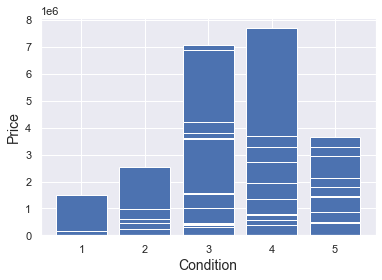

In [11]:
plt.bar(dataset['condition'], dataset['price'])
plt.xlabel('Condition', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

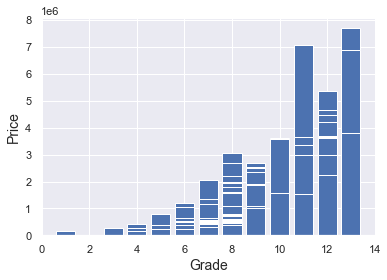

In [12]:
plt.bar(dataset['grade'], dataset['price'])
plt.xlabel('Grade', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

# => Creating Correlation Matrix :-


It will give us the better understanding of how each feature is related to target variable

In [13]:
corr_matrix = dataset.corr()
print(corr_matrix)
corr_matrix.style.background_gradient(cmap= 'RdYlGn')

                     id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.016762  0.001286   0.005160    -0.012258 -0.132109   
price         -0.016762  1.000000  0.308350   0.525138     0.702035  0.089661   
bedrooms       0.001286  0.308350  1.000000   0.515884     0.576671  0.031703   
bathrooms      0.005160  0.525138  0.515884   1.000000     0.754665  0.087740   
sqft_living   -0.012258  0.702035  0.576671   0.754665     1.000000  0.172826   
sqft_lot      -0.132109  0.089661  0.031703   0.087740     0.172826  1.000000   
floors         0.018525  0.256794  0.175429   0.500653     0.353949 -0.005201   
waterfront    -0.002721  0.266369 -0.006582   0.063744     0.103818  0.021604   
view           0.011592  0.397293  0.079532   0.187737     0.284611  0.074710   
condition     -0.023783  0.036362  0.028472  -0.124982    -0.058753 -0.008958   
grade          0.008130  0.667434  0.356967   0.664983     0.762704  0.113621   
sqft_above    -0.010842  0.6

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


**By observing the plots and correlation matrix, we found that our initial hypothesis is faulty. From our hypothesis, only 'sqft_living', and 'grade' have significant correlation with the target variable 'price**


**-Other hypothesis variables are useless to define the correlation with the target variable 'price'. S they have no predictive power for the Machine Learning Model and therefore are meaningless**


# ------------------------------------------------------------------

**However other features like 'bathrooms', 'sqft_above''sqft_living15', and'view' are found to have significant correlation with target variable 'price' as clearly seen in correlation matrix, therefore, it is indispensable to include them in training the model as they wiall play  significant role in predicting the value for the targer variable 'price'**

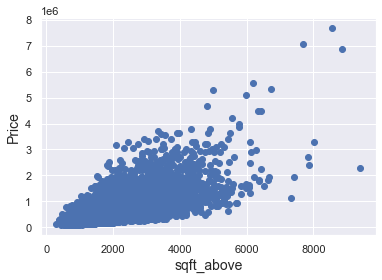

In [14]:
plt.scatter(dataset['sqft_above'], dataset['price'])
plt.xlabel('sqft_above', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

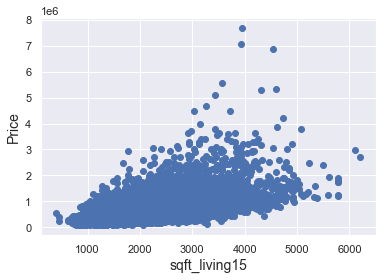

In [15]:
plt.scatter(dataset['sqft_living15'], dataset['price'])
plt.xlabel('sqft_living15', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

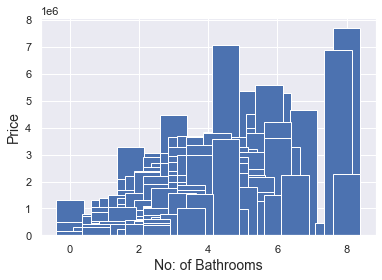

In [16]:
plt.bar(dataset['bathrooms'], dataset['price'])
plt.xlabel('No: of Bathrooms', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

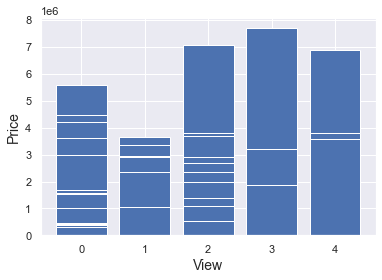

In [17]:
plt.bar(dataset['view'], dataset['price'])
plt.xlabel('View', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

# Feature Engineering:--
**To improve the accuracy, it is important to do feature engineering on some variables by applying transformation on them**

# 1. Log Transformation
**-Applying Log Tranformation on some variables ('price', 'sqft_living') having skewed distribution to make their distribution normal and to scale them in logarithm scale.**


**Looking for skewed variables:--**

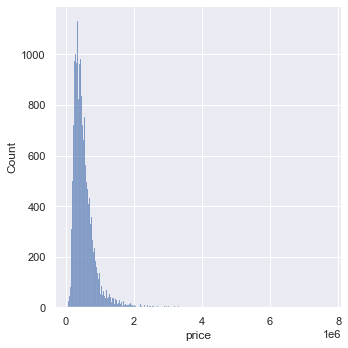

In [19]:
sns.displot(dataset['price'])

**it has been observed that price (y_train) and sqft_living are positively skewed** 

# Log Transformation of price
**Log transformation of positively skewed target variable (price) or y_train**

In [20]:
dataset['logged price']= np.log(dataset['price'])
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,logged price
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,12.309982
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,13.195614
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,12.100712
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,13.311329
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,13.142166


**Price after log transformation**

array([[<AxesSubplot:title={'center':'logged price'}>]], dtype=object)

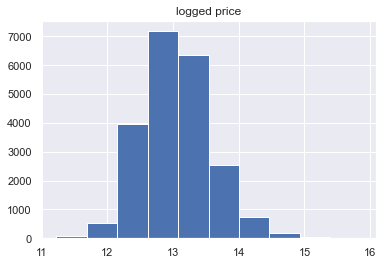

In [21]:

dataset.hist(column= 'logged price')

# Log Transformation of Feature sqft_living 
**It is also a positively skewed**

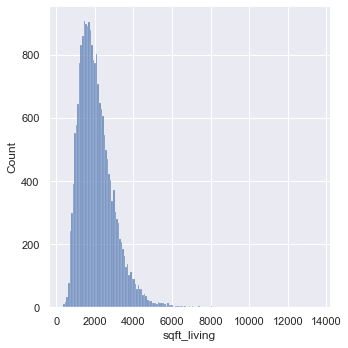

In [22]:
sns.displot(dataset['sqft_living'])

In [23]:
dataset['logged sqft_living'] = np.log(dataset.sqft_living)
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,logged price,logged sqft_living
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,12.309982,7.073270
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,13.195614,7.851661
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,12.100712,6.646391
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,13.311329,7.580700
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,13.142166,7.426549


**Feature sqft_living after log transformation**

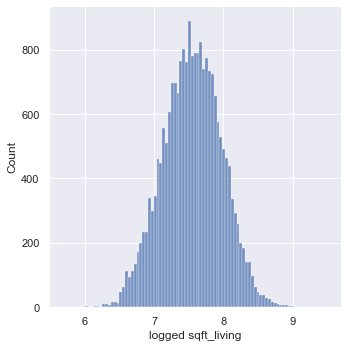

In [24]:
sns.displot(dataset['logged sqft_living'])

# 2. Creating a New Variable
 
**=> Creating two variables from Data:- year of selling and Months of selling**

In [25]:
dataset['year of selling'] = pd.DatetimeIndex(dataset['date']).year
dataset[['year of selling']]

,year of selling
0,2014
1,2014
2,2015
3,2014
4,2015
...,...
21608,2014
21609,2015
21610,2014
21611,2015


 
**=> Creating a new variable age of the house**

In [26]:
dataset['age'] = dataset['year of selling'] - dataset.yr_built
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,logged price,logged sqft_living,year of selling,age
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,12.309982,7.073270,2014,59
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,13.195614,7.851661,2014,63
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,12.100712,6.646391,2015,82
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,98136,47.5208,-122.393,1360,5000,13.311329,7.580700,2014,49
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,98074,47.6168,-122.045,1800,7503,13.142166,7.426549,2015,28


**Dropping unnecessary columns and target variable loggef price and defining X and y**

In [27]:
X= dataset.drop(['date','logged price','sqft_living','id', 'price'], axis= 'columns') 

In [28]:
y= dataset['logged price']

In [29]:
X.head()

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,logged sqft_living,year of selling,age
0,3,1.00,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,7.073270,2014,59
1,3,2.25,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,7.851661,2014,63
2,2,1.00,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,6.646391,2015,82
3,4,3.00,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,7.580700,2014,49
4,3,2.00,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,7.426549,2015,28


In [30]:
y

0        12.309982
1        13.195614
2        12.100712
3        13.311329
4        13.142166
           ...    
21608    12.793859
21609    12.899220
21610    12.904459
21611    12.899220
21612    12.691580
Name: logged price, Length: 21613, dtype: float64

In [31]:
X.shape

(21613, 20)

In [32]:
y.shape

(21613,)

# Model Building

Splitting the data into train,test data 

In [33]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [34]:
X_train.shape

(15129, 20)

In [35]:
y_train.shape

(15129,)

In [36]:
X_test.shape

(6484, 20)

In [37]:
y_test.shape

(6484,)

# Forward Selection to select best features
Selecting significant features for model training keeping in view the trade-off between accuracy and complexity

In [38]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
 
model = LinearRegression()
forward_feature_selection = sfs(model,
                                k_features = 20,
                                  forward = True,
                                verbose = 2,
                                cv = 5).fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.4s finished

[2022-09-11 14:46:35] Features: 1/20 -- score: 0.4903801707591606[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.5s finished

[2022-09-11 14:46:35] Features: 2/20 -- score: 0.627686073257947[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.5s finished

[2022-09-11 14:46:36] Features: 3/20 -- score: 0.6936275009342084[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

It is clear that at features = 8 we have optimal result for accuracy and complexity trade-off

In [39]:
dataset_a =pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T
dataset_a

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(7,)","[0.49976609732186084, 0.48432935034811975, 0.4...",0.49038,"(grade,)",0.017949,0.013965,0.006982
2,"(7, 13)","[0.6344477428531824, 0.6164335722822347, 0.621...",0.627686,"(grade, lat)",0.01884,0.014658,0.007329
3,"(7, 13, 17)","[0.7015952506673275, 0.6801475147533573, 0.690...",0.693628,"(grade, lat, logged sqft_living)",0.014147,0.011007,0.005503
4,"(7, 13, 17, 19)","[0.7330577510541543, 0.7139797438480512, 0.731...",0.729174,"(grade, lat, logged sqft_living, age)",0.013544,0.010538,0.005269
5,"(5, 7, 13, 17, 19)","[0.746871800837455, 0.7278009989418114, 0.7511...",0.745213,"(view, grade, lat, logged sqft_living, age)",0.014946,0.011628,0.005814
6,"(5, 7, 13, 15, 17, 19)","[0.7507546925040682, 0.7331479527862113, 0.757...",0.750099,"(view, grade, lat, sqft_living15, logged sqft_...",0.015017,0.011684,0.005842
7,"(1, 5, 7, 13, 15, 17, 19)","[0.755365947724633, 0.7401409941035282, 0.7621...",0.755451,"(bathrooms, view, grade, lat, sqft_living15, l...",0.013965,0.010865,0.005432
8,"(1, 4, 5, 7, 13, 15, 17, 19)","[0.7587201393103744, 0.7447094817704186, 0.768...",0.759859,"(bathrooms, waterfront, view, grade, lat, sqft...",0.014037,0.010922,0.005461
9,"(1, 4, 5, 6, 7, 13, 15, 17, 19)","[0.7618692845973242, 0.7502475181259434, 0.770...",0.763157,"(bathrooms, waterfront, view, condition, grade...",0.013215,0.010282,0.005141
10,"(1, 3, 4, 5, 6, 7, 13, 15, 17, 19)","[0.7634576891388052, 0.7519664851742267, 0.775...",0.765936,"(bathrooms, floors, waterfront, view, conditio...",0.013473,0.010482,0.005241


In [116]:
dataset_a['feature_idx'][8]

(1, 4, 5, 7, 13, 15, 17, 19)

In [117]:

dataset_a['feature_names'][8]

('bathrooms',
 'waterfront',
 'view',
 'grade',
 'lat',
 'sqft_living15',
 'logged sqft_living',
 'age')

selecting best features

In [119]:
x_trainbest = X_train[['bathrooms',
 'waterfront',
 'view',
 'grade',
 'lat',
 'sqft_living15',
 'logged sqft_living',
 'age']]

# Multiple Linear Regression:
Fitting significant features to Multiple Linear Regression and getting the score of the model


In [120]:

model = LinearRegression()
score1 = cross_val_score(model, x_trainbest, y_train, cv = 5, scoring = 'r2')
score2 = cross_val_score(model, x_trainbest, y_train, cv = 5, scoring = 'neg_root_mean_squared_error')
print('The rms value is', np.abs(score2.mean()))
print('The r square value is', score1.mean())

The rms value is 0.25826279340582425
The r square value is 0.7598589732356271


# Decision Tree Model

Using Decision Tree Algorithm because there are No formal distributional assumptions,

In [44]:
 dtr = DecisionTreeRegressor()

In [45]:
DTR_Model = DecisionTreeRegressor().fit(X_train, y_train)

In [46]:
print(f'Train Accuracy - : {DTR_Model.score(X_train,y_train):.3f}')


Train Accuracy - : 0.999


This training score shows overfiting of model

# Hyperparameter Tunning with RandomizedSearchCV
To find optimal hyperparameters to train the model



In [47]:
dtr.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [48]:
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.exceptions import FitFailedWarning 
from sklearn.model_selection import GridSearchCV

In [49]:
parameters = {'max_depth' : [8,10,11,18,20,30],
              'min_samples_leaf' : [1,2,3,4,5],
              'min_samples_split' : [2,3,4,5,10,12,1],
              'max_features': ['auto','sqrt','log2'],
               'criterion' : ['squared_error', 'friedman_mse', 'absolute_error'],
               'ccp_alpha' : [0.1, 0.01, 0.001, 0.001]
              } 

# Finding Best estimators with RandomSearch CV

In [50]:
best_dtr_random = RandomizedSearchCV(dtr,  parameters, cv = 5, verbose = True)

In [51]:
best_dtr_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'ccp_alpha': [0.1, 0.01, 0.001, 0.001],
                                        'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error'],
                                        'max_depth': [8, 10, 11, 18, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5, 10,
                                                              12, 1]},
                   verbose=True)

In [52]:
best_dtr_random.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.001, criterion='absolute_error', max_depth=11,
                      max_features='auto', min_samples_leaf=2,
                      min_samples_split=5)

In [53]:
#Building model with best estimator as per RandomizedSearchCV
# ccp_alpha=0.001 is hyperparameter to define prunning strength
DTR_Model2RS = DecisionTreeRegressor(ccp_alpha=0.001, criterion='absolute_error', max_depth=20,
                      max_features='auto', min_samples_leaf=3,
                      min_samples_split=12)

In [54]:
DTR_Model2RS.fit(X_train, y_train) # Training the model with hyperparameters as per RandomizedSearchCV

DecisionTreeRegressor(ccp_alpha=0.001, criterion='absolute_error', max_depth=20,
                      max_features='auto', min_samples_leaf=3,
                      min_samples_split=12)

In [55]:
print(f'Train Accuracy - : {DTR_Model2RS.score(X_train,y_train):.3f}')
 

Train Accuracy - : 0.762


Now our model is not overfitting on train data



**Gauging the performance of the model**

In [56]:
 score1a = cross_val_score(DTR_Model2RS,X_train, y_train, cv =5, scoring ='neg_root_mean_squared_error')
score2a = cross_val_score(DTR_Model2RS,X_train, y_train, cv =5, scoring ='r2')


In [57]:
rmsescorea2= np.abs(score1a).min
r2scorea2 =score2a.max
print("The rmse score is", rmsescorea2().min())
print("The R square value is", r2scorea2().max())


The rmse score is 0.2579332055502188
The R square value is 0.757984353609797


In [58]:
from sklearn.tree import plot_tree
 

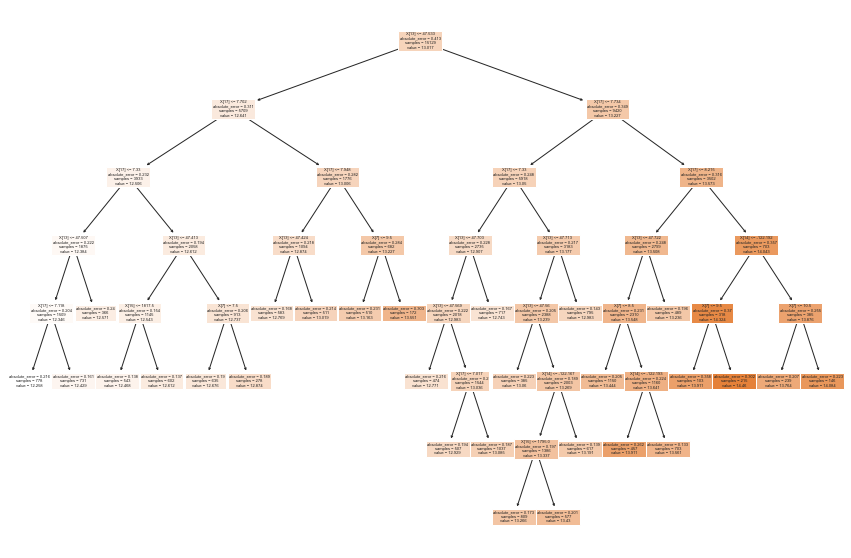

In [59]:
plt.figure(figsize = (15,10))
plot_tree(DTR_Model2RS, filled = True)
plt.show()

**Plotted Tree shows that it is not overfitted**

# Random Forest

In [60]:
rf_regressor = RandomForestRegressor()


In [61]:
RFR_Model= rf_regressor.fit(X_train,y_train)


In [62]:
print(f'Train Accuracy - : {RFR_Model.score(X_train,y_train):.3f}')

Train Accuracy - : 0.983


# Hyperparameter Tunning with RandomizedSearchCV
To find optimal hyperparameters to train the model

In [63]:
rf_regressor.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [64]:
n_estimators = [10,15,20,30] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [2,3,5,10,20] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points


In [65]:
random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [66]:
rf = RandomForestRegressor()

In [67]:
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 10, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [68]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 3, 5, 10, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [10, 15, 20, 30]},
                   random_state=35, verbose=2)

Print the best parameters

In [69]:
rf_random.best_params_

{'n_estimators': 30,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

Using the best parameters

In [70]:
randmf = RandomForestRegressor(n_estimators= 30, min_samples_split= 10, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 20, bootstrap= False)


In [71]:
randmf.fit( X_train, y_train) 

RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt',
                      min_samples_split=10, n_estimators=30)

In [72]:
print(f'Train Accuracy - : {randmf.score(X_train,y_train):.3f}')

Train Accuracy - : 0.979


**Gauging the performance of the model**

In [73]:
 score3a = cross_val_score(randmf,X_train, y_train, cv =5, scoring ='neg_root_mean_squared_error')
score3b = cross_val_score(randmf,X_train, y_train, cv =5, scoring ='r2')

In [74]:
rmsescorea3= np.abs(score3a).min
r2scorea3 =score3b.max
print("The rmse score is", rmsescorea3().min())
print("The R square value is", r2scorea3().max())

The rmse score is 0.17949373180032
The R square value is 0.8852776173333841


In [75]:
# Random forest determined feature importances
randmf.feature_importances_

array([0.00636785, 0.06268901, 0.01799226, 0.01020723, 0.00726733,
       0.02467716, 0.00575583, 0.20299104, 0.07621834, 0.02204779,
       0.02130488, 0.00221897, 0.02972928, 0.25128601, 0.02939481,
       0.07611865, 0.02336681, 0.10845429, 0.00154404, 0.02036844])

In [76]:
importance = randmf.feature_importances_

# map feature importance values to the features
feature_importances = zip(importance, X.columns)
#list(feature_importances)

sorted_feature_importances = sorted(feature_importances, reverse = True)
#print(sorted_feature_importances)

top_15_predictors = sorted_feature_importances[0:15]
values = [value for value, predictors in top_15_predictors]
predictors = [predictors for value, predictors in top_15_predictors]
print(predictors)

['lat', 'grade', 'logged sqft_living', 'sqft_above', 'sqft_living15', 'bathrooms', 'zipcode', 'long', 'view', 'sqft_lot15', 'sqft_basement', 'yr_built', 'age', 'sqft_lot', 'floors']


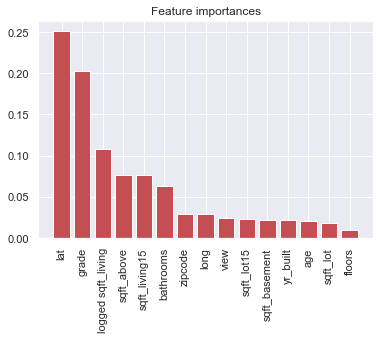

In [77]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(len(predictors)), values,color="r", align="center");
plt.xticks(range(len(predictors)), predictors, rotation=90);

# Testing with Random Forest

In [78]:
randmf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt',
                      min_samples_split=10, n_estimators=30)

In [79]:
pre4=randmf.predict(X_test)
pre4

array([12.61265875, 14.28573   , 13.19568517, ..., 12.7347056 ,
       12.35646747, 12.21531976])

In [80]:
print(f'Test Accuracy - : {randmf.score(X_test,y_test):.3f}')

Test Accuracy - : 0.885


In [81]:
rmsrf= mean_squared_error(y_test, pre4, squared=False)
mae3= mean_absolute_error(y_test, pre4)
print("RMSE :", rmsrf) # RMSE, # squared  If True returns MSE value, if False returns RMSE value
print("MAE :", mae3)

RMSE : 0.17834985736532685
MAE : 0.1260726381476604


Testing for 5 folds

In [82]:
 score3a = cross_val_score(randmf,X_test, y_test, cv =5, scoring ='neg_root_mean_squared_error')
score3b = cross_val_score(randmf,X_test, y_test, cv =5, scoring ='r2')

In [157]:
rmsescorea3= np.abs(score3a).min
r2scorea3 =score3b.max
print("The rmse score is", rmsescorea3().min())
print("The R square value is", r2scorea3().max())

The rmse score is 0.17658063094763823
The R square value is 0.8825509984266364


# Testing with Decision Tree Model

After fitting all the model, it is time to   evaluate their performance on the test dataset.

 

In [84]:
DTR_Model2RS.fit(X_train, y_train)


DecisionTreeRegressor(ccp_alpha=0.001, criterion='absolute_error', max_depth=20,
                      max_features='auto', min_samples_leaf=3,
                      min_samples_split=12)

In [85]:
pre3=DTR_Model2RS.predict(X_test)
pre3


array([12.74256602, 14.08383268, 13.08455766, ..., 12.67607627,
       12.42881612, 12.42881612])

In [86]:
print(f'Test Accuracy - : {DTR_Model2RS.score(X_test,y_test):.3f}')


Test Accuracy - : 0.764


In [87]:
rmsDTR= mean_squared_error(y_test, pre3, squared=False)
mae1= mean_absolute_error(y_test, pre3)
print("RMSE :", rmsDTR) # RMSE, # squared  If True returns MSE value, if False returns RMSE value
print("MAE :", mae1)

RMSE : 0.2549401676297483
MAE : 0.18823794171112648


Testing for 5 folds

In [88]:
 score1a = cross_val_score(DTR_Model2RS,X_test, y_test, cv =5, scoring ='neg_root_mean_squared_error')
score2a = cross_val_score(DTR_Model2RS,X_test, y_test, cv =5, scoring ='r2')


In [153]:
 
rmsescorea2= np.abs(score1a)
r2scorea2 =score2a.max
print("The rmse score is", rmsescorea2.min())
print("The R square value is", r2scorea2().max())

The rmse score is 0.2476693789174272
The R square value is 0.7790776484770369


# Testing with Linear Regression Model

In [121]:
# Defining xtest with same parameters selected via forward selection
x_testbest = X_test[['bathrooms',
 'waterfront',
 'view',
 'grade',
 'lat',
 'sqft_living15',
 'logged sqft_living',
 'age']]

In [122]:
model.fit(x_trainbest, y_train) 
pre2=model.predict(x_testbest)
pre2

array([12.83922392, 14.3831766 , 13.04311749, ..., 12.62528661,
       12.49551001, 12.33188429])

In [123]:
print(f'Test Accuracy - : {model.score(x_testbest,y_test):.3f}')

Test Accuracy - : 0.764


In [124]:
rmslr = mean_squared_error(y_test, pre2, squared=False)
mae2 = mean_absolute_error(y_test, pre2)
print("RMSE :", rmslr) # RMSE, # squared  If True returns MSE value, if False returns RMSE value
print("MAE :", mae2)

RMSE : 0.2552451476735597
MAE : 0.19743324599079695


Testing for 5 folds

In [125]:
score1 = cross_val_score(model, x_testbest, y_test, cv = 5, scoring = 'r2')
score2 = cross_val_score(model, x_testbest, y_test, cv = 5, scoring = 'neg_root_mean_squared_error')

In [126]:
rmselr= np.abs(score2)
print('The rms value is',rmselr.min() )
print('The r square value is', score1.mean())

The rms value is 0.2493541727472672
The r square value is 0.7625947756126903


In [127]:
from sklearn.metrics import explained_variance_score

In [128]:
expl_mlr = explained_variance_score(pre2,y_test)

In [129]:
expl_mlr

0.6894492791850799

In [130]:
expl_tr = explained_variance_score(pre3,y_test)

In [131]:
expl_tr 

0.6823028498921757

In [132]:
expl_rf = explained_variance_score(pre4,y_test)

In [133]:
expl_rf

0.8593522552706222

# Metrics of Best Model

**Mean Absolute error and Root Mean Square Error Comparison of *Decision Tree Regressor*, *Linear Regression* Models**

In [134]:
indexes = ["Mean Absolute Error", "Root Mean Square Error"]

In [135]:
data = [[mae1, mae2, mae3], [rmsDTR, rmslr,rmsrf]]

In [136]:
model_result = pd.DataFrame(data, columns = ["Decision Tree Regressor", "Linear Regression", "Random Forest"], index = indexes)
model_result

,Decision Tree Regressor,Linear Regression,Random Forest
Mean Absolute Error,0.188238,0.197433,0.126073
Root Mean Square Error,0.254940,0.255245,0.178350


# RMSE for 5 folds and Explained Variance Score

In [161]:
rmselr0 = rmselr.min() 

In [162]:

rmsescorea2= np.abs(score1a)
rmsedtr0 = rmsescorea2.min()
rmsedtr0

0.2476693789174272

In [163]:
rmsescorea3= np.abs(score3a).min
rmserf0 = rmsescorea3().min()
rmserf0 

0.17658063094763823

In [164]:
models_score =pd.DataFrame({'Model':['Multiple Linear Regression','Decision Tree','Random forest Regression'],
                            'RMSE':[rmselr0,rmsedtr0,rmserf0],
                            'Explained Variance Score':[expl_mlr,expl_tr,expl_rf]
                           })
models_score.sort_values(by='RMSE',ascending=False)

,Model,RMSE,Explained Variance Score
0,Multiple Linear Regression,0.249354,0.689449
1,Decision Tree,0.247669,0.682303
2,Random forest Regression,0.176581,0.859352


# Conclusion
**So comparing the mean absolute error and root mean square error of Linear Regression Model, Decision Tree Regressor model, and Random Forest Regressor model it is clear that Random Forest Regressor model is outperforming the other two models**